In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/Users/ken/deep_learning_practice/dogs-vs-cats/'

In [3]:
base_dir = '/Users/ken/deep_learning_practice/cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [6]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [10]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

FileExistsError: [Errno 17] File exists: '/Users/ken/deep_learning_practice/cats_and_dogs_small/validation/cats'

In [9]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [19]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [20]:
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

500
500


In [21]:
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

500
500


In [22]:
from keras import models, layers

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [27]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [28]:
#converting images into tensors

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50
                             )

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 70s 697ms/step - loss: 0.6948 - acc: 0.5143 - val_loss: 0.6813 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 109s 1s/step - loss: 0.6625 - acc: 0.6006 - val_loss: 0.7009 - val_acc: 0.5410
Epoch 3/30
100/100 [==============================] - 99s 989ms/step - loss: 0.6287 - acc: 0.6380 - val_loss: 0.6527 - val_acc: 0.5970
Epoch 4/30
100/100 [==============================] - 97s 971ms/step - loss: 0.5906 - acc: 0.6855 - val_loss: 0.6185 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 91s 909ms/step - loss: 0.5446 - acc: 0.7276 - val_loss: 0.5695 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 88s 883ms/step - loss: 0.5175 - acc: 0.7404 - val_loss: 0.5673 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 84s 838ms/step - loss: 0.4988 - acc: 0.7604 - val_loss: 0.5634 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 83s

In [30]:
model.save('cats_and_dogs_small_1.h5')

In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

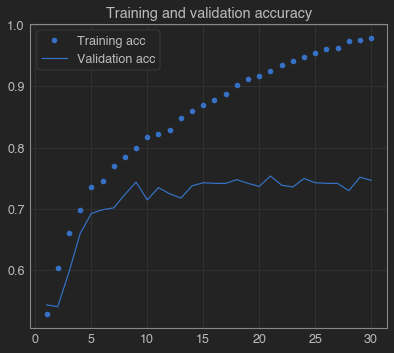

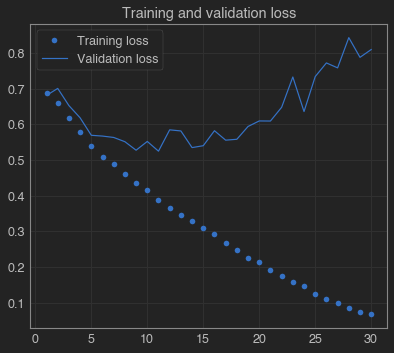

In [32]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [33]:
#augmentation
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

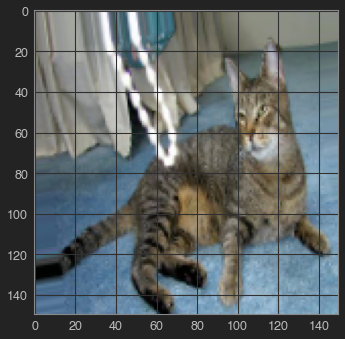

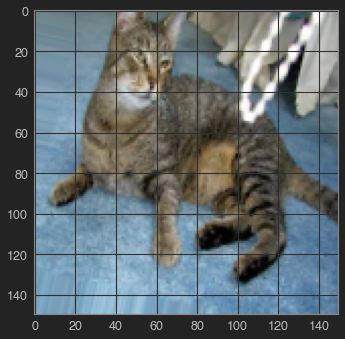

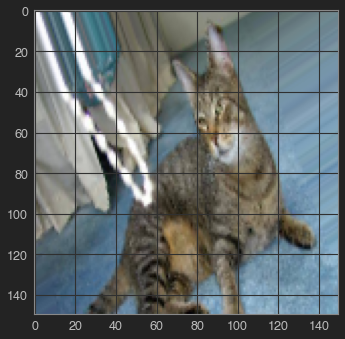

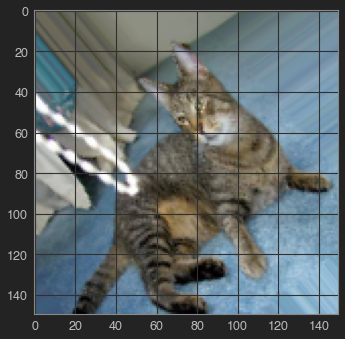

In [34]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [35]:
#new convnet with dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

#dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [46]:
train_dir, validation_dir

('/Users/ken/deep_learning_practice/cats_and_dogs_small/train',
 '/Users/ken/deep_learning_practice/cats_and_dogs_small/validation')

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )  # fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 74s 739ms/step - loss: 0.6649 - acc: 0.5960 - val_loss: 0.6398 - val_acc: 0.6060


In [42]:
model.save('cats_and_dogs_small_2.h5')

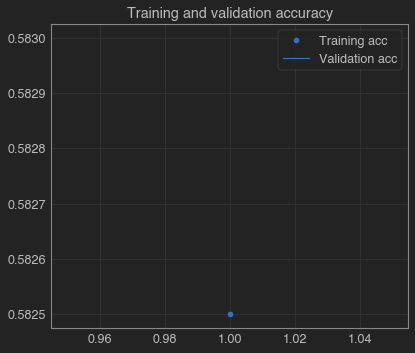

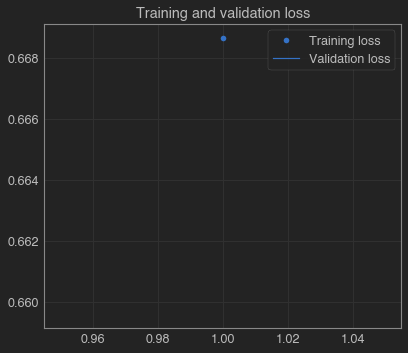

In [48]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [50]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 2s 0us/step


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [52]:
test_dir

'/Users/ken/deep_learning_practice/cats_and_dogs_small/test'

In [53]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [54]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [55]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [56]:
train_features = np.reshape(train_features, (2000,4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [57]:
#defining and training densely connected classifier
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 0.7081 - acc: 0.5911 - val_loss: 0.4503 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 2s 15ms/step - loss: 0.4427 - acc: 0.7989 - val_loss: 0.3657 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 2s 15ms/step - loss: 0.3680 - acc: 0.8376 - val_loss: 0.3241 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3220 - acc: 0.8672 - val_loss: 0.3062 - val_acc: 0.8890
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2987 - acc: 0.8776 - val_loss: 0.2868 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2552 - acc: 0.8950 - val_loss: 0.2750 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2395 - acc: 0.9074 - val_loss: 0.2672 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 2s 16ms/step - 

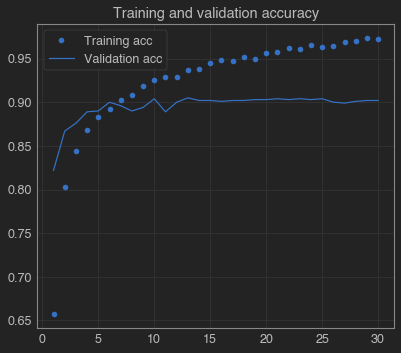

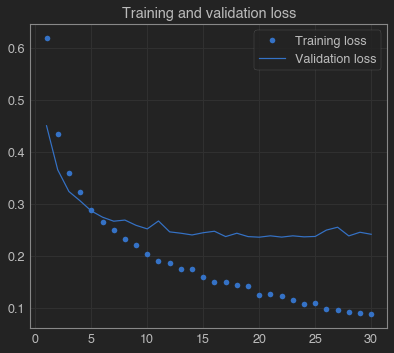

In [58]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [61]:
img_path = '/Users/ken/deep_learning_practice/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [74]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1,150,150,3)
print(img_tensor.shape)

(1, 150, 150, 3)


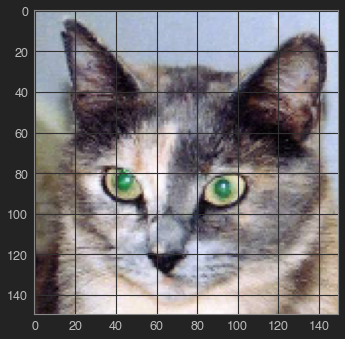

In [75]:
plt.imshow(img_tensor[0])
plt.show()

In [76]:
img_tensor

array([[[[0.6431373 , 0.68235296, 0.7294118 ],
         [0.6313726 , 0.67058825, 0.7176471 ],
         [0.62352943, 0.67058825, 0.7254902 ],
         ...,
         [0.7764706 , 0.8392157 , 0.9411765 ],
         [0.78431374, 0.84705883, 0.9490196 ],
         [0.78431374, 0.84705883, 0.9490196 ]],

        [[0.627451  , 0.6666667 , 0.7137255 ],
         [0.6156863 , 0.654902  , 0.7019608 ],
         [0.6117647 , 0.65882355, 0.7137255 ],
         ...,
         [0.78039217, 0.84313726, 0.94509804],
         [0.7882353 , 0.8509804 , 0.9529412 ],
         [0.7882353 , 0.8509804 , 0.9529412 ]],

        [[0.6313726 , 0.67058825, 0.7176471 ],
         [0.62352943, 0.6627451 , 0.70980394],
         [0.61960787, 0.6666667 , 0.72156864],
         ...,
         [0.78039217, 0.84313726, 0.94509804],
         [0.78039217, 0.84313726, 0.94509804],
         [0.78039217, 0.84313726, 0.94509804]],

        ...,

        [[0.25882354, 0.19607843, 0.20784314],
         [0.21176471, 0.14509805, 0.16862746]